<a href="https://colab.research.google.com/github/AchyDaMan/airbnbdata/blob/main/airbnb_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-processing

In [29]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("/content/listings.csv")
df2 = pd.read_csv("/content/neighborhood.csv")
df3 = pd.read_csv("/content/reviews.csv")


df1

,id,name,host_id,host_name,neighborhood_id,room_type,price,minimum_nights,reviews_id,calculated_host_listings_count,availability_365
0,5.456000e+03,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,1,Entire home/apt,126,2,1,1,306
1,5.769000e+03,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,2,Private room,45,1,2,1,0
2,6.413000e+03,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,3,Entire home/apt,57,30,3,1,0
3,6.448000e+03,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,4,Entire home/apt,159,3,4,1,156
4,8.502000e+03,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,5,Entire home/apt,48,4,5,1,98
...,...,...,...,...,...,...,...,...,...,...,...
14856,9.763800e+17,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,14857,Private room,50,1,14857,5,269
14857,9.768100e+17,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,14858,Entire home/apt,157,1,14858,6,365
14858,9.768190e+17,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,14859,Entire home/apt,117,1,14859,19,176
14859,9.768220e+17,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,14860,Entire home/apt,133,2,14860,1,268


# Merge tables together

In [30]:
merged_df = pd.merge(df1, df2, on='neighborhood_id', how='inner')
merged_df = pd.merge(merged_df, df3, on='reviews_id', how='inner')
merged_df.head()

,id,name,host_id,host_name,neighborhood_id,room_type,price,minimum_nights,reviews_id,calculated_host_listings_count,availability_365,neighborhood,latitude,longitude,number_of_reviews,last_review,reviews_per_month,number_of_reviews_ltm
0,5456.0,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,1,Entire home/apt,126,2,1,1,306,78702,30.26057,-97.73441,657,8/27/2023,3.72,42
1,5769.0,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,2,Private room,45,1,2,1,0,78729,30.45697,-97.78422,290,8/4/2023,1.77,21
2,6413.0,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,3,Entire home/apt,57,30,3,1,0,78704,30.24885,-97.73587,122,10/17/2022,0.73,3
3,6448.0,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,4,Entire home/apt,159,3,4,1,156,78704,30.26034,-97.76487,305,9/4/2023,2.09,17
4,8502.0,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,5,Entire home/apt,48,4,5,1,98,78741,30.23466,-97.73682,51,5/16/2023,0.31,3


# Check for unique vals

In [31]:
for names in merged_df.columns.tolist():
  unique = merged_df[names].unique()
  num_unique = merged_df[names].nunique()

  print(names +" Unique values:", unique)
  print("Number of unique values:", num_unique)
  print()

id Unique values: [5.45600e+03 5.76900e+03 6.41300e+03 ... 9.76819e+17 9.76822e+17
 9.77065e+17]
Number of unique values: 14381

name Unique values: ['Guesthouse in Austin · ★4.84 · 1 bedroom · 2 beds · 1 bath'
 'Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1 shared bath'
 'Guesthouse in Austin · ★4.97 · Studio · 1 bed · 1 bath' ...
 'Rental unit in Austin · ★New · 6 bedrooms · 6 beds · 6 baths'
 'Home in West Lake Hills · ★New · 3 bedrooms · 5 beds · 2 baths'
 'Home in Austin · ★New · 4 bedrooms · 3 beds · 2.5 baths']
Number of unique values: 5423

host_id Unique values: [     8028      8186     13879 ... 186814098 536308631  61319798]
Number of unique values: 8834

host_name Unique values: ['Sylvia' 'Elizabeth' 'Todd' ... 'Ruchira' 'Istvan' 'Michael And Lailaa']
Number of unique values: 3415

neighborhood_id Unique values: [    1     2     3 ... 14859 14860 14861]
Number of unique values: 14861

room_type Unique values: ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
Nu

# Drop unusable columns (mainly identifiers)

In [32]:
merged_df = merged_df.drop(["name", "host_name", "id","host_id","reviews_id", "neighborhood_id", "last_review"], axis = 1)

merged_df.head()

,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighborhood,latitude,longitude,number_of_reviews,reviews_per_month,number_of_reviews_ltm
0,Entire home/apt,126,2,1,306,78702,30.26057,-97.73441,657,3.72,42
1,Private room,45,1,1,0,78729,30.45697,-97.78422,290,1.77,21
2,Entire home/apt,57,30,1,0,78704,30.24885,-97.73587,122,0.73,3
3,Entire home/apt,159,3,1,156,78704,30.26034,-97.76487,305,2.09,17
4,Entire home/apt,48,4,1,98,78741,30.23466,-97.73682,51,0.31,3


# Check and drop duplicates

In [33]:
# Check
number_of_duplicates = merged_df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Drop dupes
merged_df = merged_df.drop_duplicates()

# Check again
number_of_duplicates = merged_df.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates before : 61
 Number of duplicates after removing : 0


In [34]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14800 entries, 0 to 14860
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       14800 non-null  object 
 1   price                           14800 non-null  int64  
 2   minimum_nights                  14800 non-null  int64  
 3   calculated_host_listings_count  14800 non-null  int64  
 4   availability_365                14800 non-null  int64  
 5   neighborhood                    14800 non-null  int64  
 6   latitude                        14800 non-null  float64
 7   longitude                       14800 non-null  float64
 8   number_of_reviews               14800 non-null  int64  
 9   reviews_per_month               11757 non-null  float64
 10  number_of_reviews_ltm           14800 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.4+ MB


# Drop null data values

In [35]:
# Drop null
merged_df= merged_df.dropna()


# Check again
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11757 entries, 0 to 14783
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       11757 non-null  object 
 1   price                           11757 non-null  int64  
 2   minimum_nights                  11757 non-null  int64  
 3   calculated_host_listings_count  11757 non-null  int64  
 4   availability_365                11757 non-null  int64  
 5   neighborhood                    11757 non-null  int64  
 6   latitude                        11757 non-null  float64
 7   longitude                       11757 non-null  float64
 8   number_of_reviews               11757 non-null  int64  
 9   reviews_per_month               11757 non-null  float64
 10  number_of_reviews_ltm           11757 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.1+ MB


# Feature Engineering

In [36]:

def transform(df):
  X = df[["room_type", "price", "minimum_nights", "calculated_host_listings_count", "availability_365", \
          "neighborhood", "latitude", "longitude", "number_of_reviews", "reviews_per_month", "number_of_reviews_ltm"]]
  groups = {
      "Entire home/apt": 1, "Private room": 2, "Shared room": 3, "Hotel room": 4
  }
  X['room_type'] = [groups.get(x) for x in df['room_type']]
  return X

df = transform(merged_df)
df


,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighborhood,latitude,longitude,number_of_reviews,reviews_per_month,number_of_reviews_ltm
0,1,126,2,1,306,78702,30.260570,-97.734410,657,3.72,42
1,2,45,1,1,0,78729,30.456970,-97.784220,290,1.77,21
2,1,57,30,1,0,78704,30.248850,-97.735870,122,0.73,3
3,1,159,3,1,156,78704,30.260340,-97.764870,305,2.09,17
4,1,48,4,1,98,78741,30.234660,-97.736820,51,0.31,3
...,...,...,...,...,...,...,...,...,...,...,...
14722,1,111,1,2,5,78722,30.282740,-97.722131,1,1.00,1
14743,1,96,1,126,363,78750,30.365750,-97.795130,2,2.00,2
14744,1,85,1,126,348,78750,30.367775,-97.796584,1,1.00,1
14748,1,79,1,5,317,78723,30.318744,-97.689007,1,1.00,1


# Plot the distributions of each feature

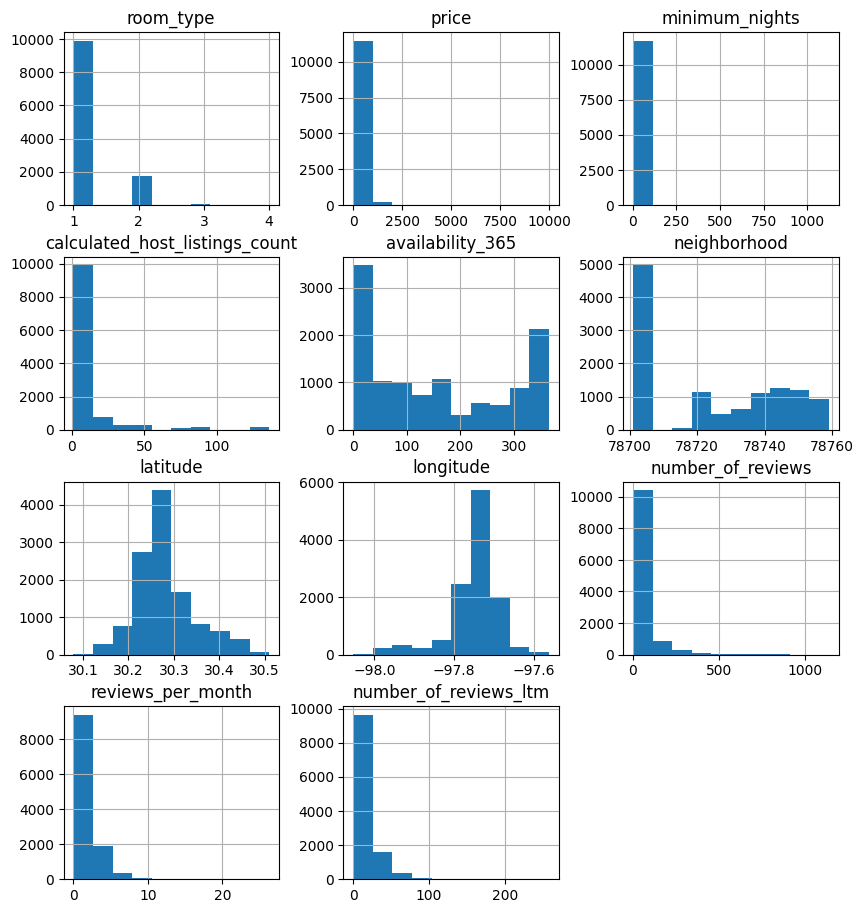

In [37]:
import matplotlib.pyplot as plt

df[df.columns].hist(figsize=(10, 11))
plt.show()

In [38]:
df.head()

,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighborhood,latitude,longitude,number_of_reviews,reviews_per_month,number_of_reviews_ltm
0,1,126,2,1,306,78702,30.26057,-97.73441,657,3.72,42
1,2,45,1,1,0,78729,30.45697,-97.78422,290,1.77,21
2,1,57,30,1,0,78704,30.24885,-97.73587,122,0.73,3
3,1,159,3,1,156,78704,30.26034,-97.76487,305,2.09,17
4,1,48,4,1,98,78741,30.23466,-97.73682,51,0.31,3


In [39]:
# Check
number_of_duplicates = df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

# Drop dupes
df = df.drop_duplicates()

# Check again
number_of_duplicates = df.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")
# Drop null
df = df.dropna()

# Check again
df.info()

 Number of duplicates before : 0
 Number of duplicates after removing : 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11757 entries, 0 to 14783
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_type                       11757 non-null  int64  
 1   price                           11757 non-null  int64  
 2   minimum_nights                  11757 non-null  int64  
 3   calculated_host_listings_count  11757 non-null  int64  
 4   availability_365                11757 non-null  int64  
 5   neighborhood                    11757 non-null  int64  
 6   latitude                        11757 non-null  float64
 7   longitude                       11757 non-null  float64
 8   number_of_reviews               11757 non-null  int64  
 9   reviews_per_month               11757 non-null  float64
 10  number_of_reviews_ltm           11757 non-null  int64  
dtypes: float64(3), int6

In [40]:
df

,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighborhood,latitude,longitude,number_of_reviews,reviews_per_month,number_of_reviews_ltm
0,1,126,2,1,306,78702,30.260570,-97.734410,657,3.72,42
1,2,45,1,1,0,78729,30.456970,-97.784220,290,1.77,21
2,1,57,30,1,0,78704,30.248850,-97.735870,122,0.73,3
3,1,159,3,1,156,78704,30.260340,-97.764870,305,2.09,17
4,1,48,4,1,98,78741,30.234660,-97.736820,51,0.31,3
...,...,...,...,...,...,...,...,...,...,...,...
14722,1,111,1,2,5,78722,30.282740,-97.722131,1,1.00,1
14743,1,96,1,126,363,78750,30.365750,-97.795130,2,2.00,2
14744,1,85,1,126,348,78750,30.367775,-97.796584,1,1.00,1
14748,1,79,1,5,317,78723,30.318744,-97.689007,1,1.00,1


# Categorizing our Target Variable: Price

- Prices equal to and lower than the mean price will be classified as 0
- Prices greater than the mean price will be classified as 1
- Categorizing our target and using a classifier model to predict leads to higher accuracy

In [41]:
mean_price= np.mean(df['price'])
# Make the prices lower than the mean price as 0.
df.loc[df["price"] <= mean_price, "price"] = 0
# Make the prices higher than the mean price as 1.
df.loc[df["price"] > mean_price, "price"] = 1

In [42]:
df

,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,neighborhood,latitude,longitude,number_of_reviews,reviews_per_month,number_of_reviews_ltm
0,1,0,2,1,306,78702,30.260570,-97.734410,657,3.72,42
1,2,0,1,1,0,78729,30.456970,-97.784220,290,1.77,21
2,1,0,30,1,0,78704,30.248850,-97.735870,122,0.73,3
3,1,0,3,1,156,78704,30.260340,-97.764870,305,2.09,17
4,1,0,4,1,98,78741,30.234660,-97.736820,51,0.31,3
...,...,...,...,...,...,...,...,...,...,...,...
14722,1,0,1,2,5,78722,30.282740,-97.722131,1,1.00,1
14743,1,0,1,126,363,78750,30.365750,-97.795130,2,2.00,2
14744,1,0,1,126,348,78750,30.367775,-97.796584,1,1.00,1
14748,1,0,1,5,317,78723,30.318744,-97.689007,1,1.00,1


# Evaluating Different ML models

# Logistic Regression Classifier

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop([ "price"], axis = 1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
classifier= LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1733
           1       0.00      0.00      0.00       619

    accuracy                           0.74      2352
   macro avg       0.37      0.50      0.42      2352
weighted avg       0.54      0.74      0.63      2352



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

# MLP Classifier (Neural nets)

In [44]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

classi = MLPClassifier(random_state=42)
X1=df.drop(["price"], axis = 1)
Y1=df["price"].values


X_train, X_test, y_train, y_test = train_test_split(
             X1, Y1, test_size = 0.2, random_state=42)

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#fit the model
classi.fit(X_train, y_train)

# Make predictions on the test set
predictions = classi.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# Calculate the accuracy of the model
print("Accuracy of MLP model", accuracy_score(y_test, predictions))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Mean Absolute Error: 0.23214285714285715
Mean Squared Error: 0.23214285714285715
Root Mean Squared Error: 0.48181205582971576
Accuracy of MLP model 0.7678571428571429
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1733
           1       0.63      0.29      0.40       619

    accuracy                           0.77      2352
   macro avg       0.71      0.61      0.63      2352
weighted avg       0.75      0.77      0.74      2352



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# KNN Classifier Model

In [45]:
#K-nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

X1=df.drop(["price"], axis = 1)
Y1=df['price']


X_train, X_test, y_train, y_test = train_test_split(
             X1, Y1, test_size = 0.2, random_state=42)

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#fit the model
neigh.fit(X_train, y_train)

# Make predictions on the test set
predictions = neigh.predict(X_test)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
# Calculate the accuracy of the model
print("Accuracy of KNN model", accuracy_score(y_test, predictions))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Mean Absolute Error: 0.25977891156462585
Mean Squared Error: 0.25977891156462585
Root Mean Squared Error: 0.5096851102049439
Accuracy of KNN model 0.7402210884353742
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1733
           1       0.51      0.45      0.48       619

    accuracy                           0.74      2352
   macro avg       0.66      0.65      0.65      2352
weighted avg       0.73      0.74      0.73      2352



# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

# Choose a regression model (Random Forest Regressor in this example)
#model = RandomForestRegressor(n_estimators=100, random_state=42)
rand_model = RandomForestClassifier(random_state=42)

#Linear regression
X = df.drop(["price"], axis = 1)
y = df["price"]

#split the data
X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
rand_model.fit(X_train, y_train)

# Make predictions on the test set
rand_predictions = rand_model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rand_predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rand_predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rand_predictions)))
print('The accuracy of the Random Forest Model is', accuracy_score(y_test, rand_predictions))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, rand_predictions))

Mean Absolute Error: 0.2193877551020408
Mean Squared Error: 0.2193877551020408
Root Mean Squared Error: 0.46838846602157147
The accuracy of the Random Forest Model is 0.7806122448979592
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1733
           1       0.63      0.41      0.50       619

    accuracy                           0.78      2352
   macro avg       0.72      0.66      0.68      2352
weighted avg       0.76      0.78      0.76      2352



# Support Vector Classifier

In [47]:
from sklearn.svm import SVC
svc_model = SVC(random_state=42)

X = df.drop(["price"], axis = 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = svc_model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

score = svc_model.score(X_test,y_test)
print('The accuracy of the SVC is', accuracy_score(y_test, predictions))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Mean Absolute Error: 0.23767006802721088
Mean Squared Error: 0.23767006802721088
Root Mean Squared Error: 0.4875141721296017
The accuracy of the SVC is 0.7623299319727891
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.85      1733
           1       0.63      0.23      0.34       619

    accuracy                           0.76      2352
   macro avg       0.70      0.59      0.60      2352
weighted avg       0.74      0.76      0.72      2352



# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

X = df.drop(["price"], axis = 1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

score = model.score(X_test,y_test)
print('The accuracy of the Decision Tree Model is', accuracy_score(y_test, predictions))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Mean Absolute Error: 0.27040816326530615
Mean Squared Error: 0.27040816326530615
Root Mean Squared Error: 0.5200078492343227
The accuracy of the Decision Tree Model is 0.7295918367346939
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1733
           1       0.49      0.52      0.50       619

    accuracy                           0.73      2352
   macro avg       0.66      0.66      0.66      2352
weighted avg       0.73      0.73      0.73      2352



# Catboost Model

In [49]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
X = df.drop(["price"], axis = 1)
y = df["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='MultiClass', cat_features=[1, 2, 3])

# Train the model
catboost_model.fit(X_train, y_train)


# Make predictions on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the model

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


0:	learn: 0.6776016	total: 75.6ms	remaining: 37.7s
1:	learn: 0.6628140	total: 141ms	remaining: 35.2s
2:	learn: 0.6497508	total: 238ms	remaining: 39.4s
3:	learn: 0.6375363	total: 324ms	remaining: 40.2s
4:	learn: 0.6258982	total: 474ms	remaining: 46.9s
5:	learn: 0.6153903	total: 599ms	remaining: 49.3s
6:	learn: 0.6057263	total: 668ms	remaining: 47.1s
7:	learn: 0.5962542	total: 746ms	remaining: 45.9s
8:	learn: 0.5875231	total: 820ms	remaining: 44.7s
9:	learn: 0.5794773	total: 968ms	remaining: 47.4s
10:	learn: 0.5721738	total: 1.15s	remaining: 50.9s
11:	learn: 0.5645700	total: 1.28s	remaining: 52s
12:	learn: 0.5579062	total: 1.45s	remaining: 54.2s
13:	learn: 0.5516179	total: 1.59s	remaining: 55.1s
14:	learn: 0.5456925	total: 1.76s	remaining: 57.1s
15:	learn: 0.5405966	total: 2s	remaining: 1m
16:	learn: 0.5356551	total: 2.32s	remaining: 1m 5s
17:	learn: 0.5307512	total: 2.57s	remaining: 1m 8s
18:	learn: 0.5263974	total: 2.73s	remaining: 1m 9s
19:	learn: 0.5220923	total: 2.95s	remaining: 1m 

# XGBoost Classifier

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
X = df.drop(["price"], axis = 1)
y = df["price"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Testing Combining Models together

# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
# Assuming clf1, clf2, clf3 are your individual classifiers
ensemble_model = VotingClassifier(estimators=[('clf1', xgb_model), ('clf2', rand_model), ('clf3', classi), ("clf4", svc_model)], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f'Accuracy: {accuracy}')

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble))

# Stacking Classifier (highest accuracy!)

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

X = df.drop(["price"], axis = 1)
y = df["price"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# meta_classifier is the model that combines their predictions
#
stacking_model = StackingClassifier(estimators=[('clf1', xgb_model), ('clf2', rand_model), ("clf3", classi)],
                                    final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy: {accuracy}')

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_stacking))

# Evaluation for our best model (Stacking Classifier Model)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_stacking)

print (f"AUC of the Logistic Classifier on test data= {auc}")

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_stacking)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Confusion Matrix
import seaborn as sn
from sklearn.metrics import (confusion_matrix)

conf_matrix = confusion_matrix(y_test, y_pred_stacking)
conf_matrix

df_cm = pd.DataFrame(conf_matrix)
df_cm

ylabels = ["Actual Negative", "Actual Positive"]
xlabels = ["Predicted Negative", "Predicted Positive"]

plt.figure(figsize = (6,6))
sn.heatmap(df_cm, annot=True, xticklabels=xlabels, yticklabels=ylabels, fmt='g')